Importing Dependencies


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Data Collection and Analysis

In [3]:
insurance_dataset=pd.read_csv('/content/insurance.csv')

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_dataset.shape

(1338, 7)

In [7]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
1. Sex
2. Smoker
3. Region

In [8]:
#checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [9]:
#statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-10-830d92179ee8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


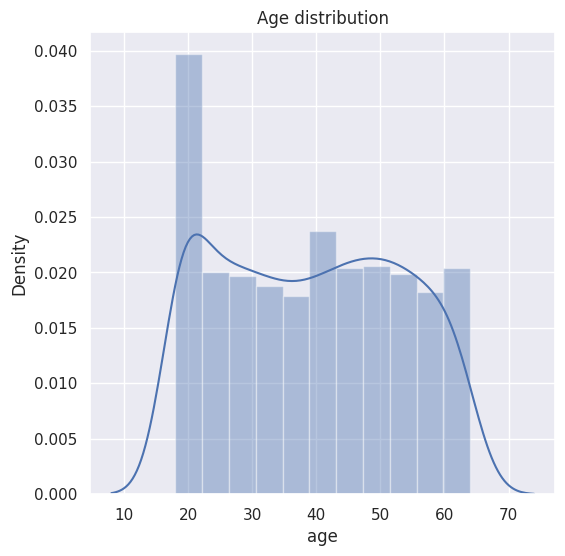

In [10]:
#distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

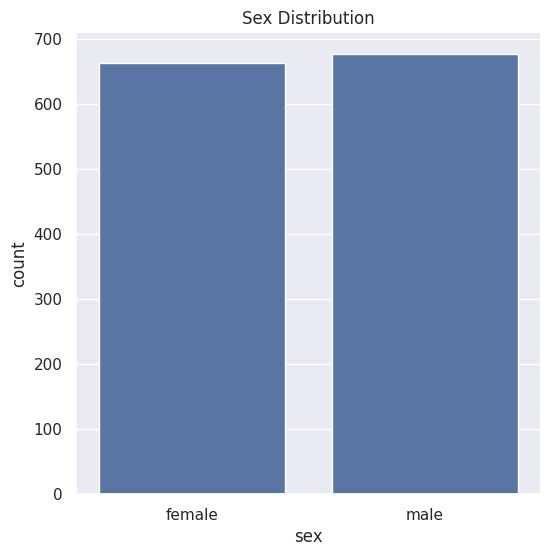

In [11]:
#gender distribution
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

<ipython-input-12-97af0f7816bf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


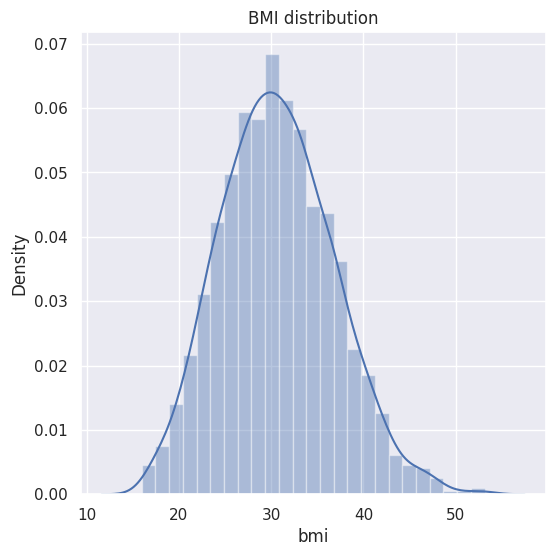

In [12]:
#distribution of bmi
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI distribution')
plt.show()

Normal BMI Range -> 18.5 to 24.9

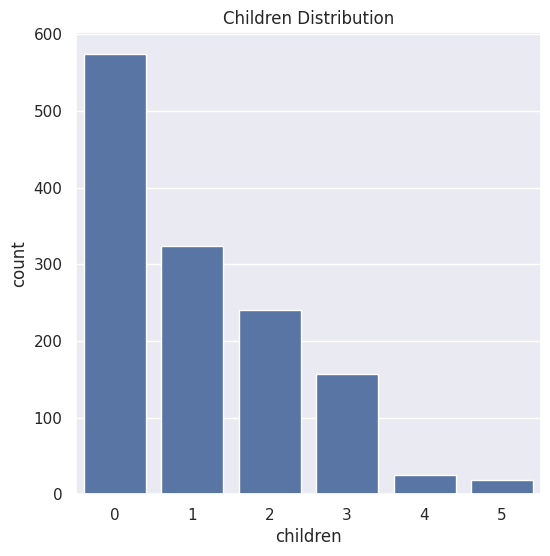

In [13]:
#Children distribution
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children Distribution')
plt.show()

In [14]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


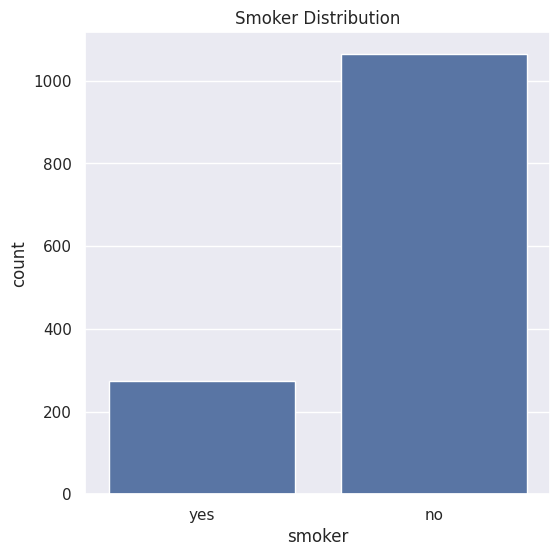

In [15]:
#Smoker distribution
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

In [16]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


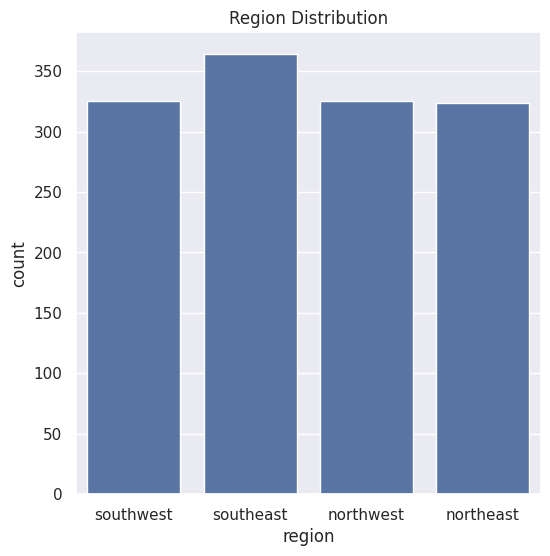

In [17]:
#Region distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region Distribution')
plt.show()

In [18]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-19-0124d61149fb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


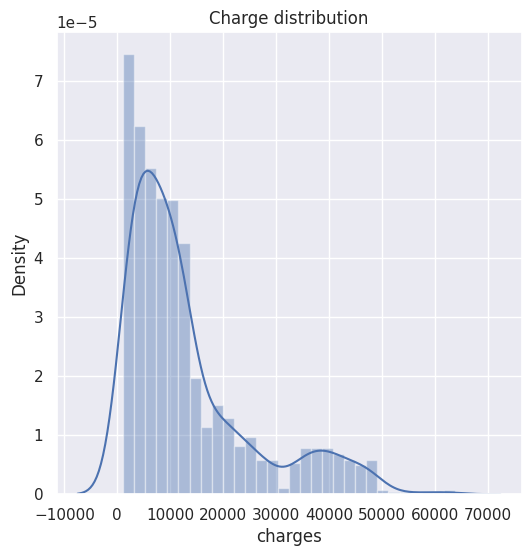

In [19]:
#distribution of charge

plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charge distribution')
plt.show()

Data Preprocessing

Encoding categorical features

In [23]:
insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


Splitting the feature and target

In [24]:
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

In [25]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [26]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into training and testing data

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [29]:
print(X.shape, X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training
Linear Regression

In [31]:
#loading linear regression model
regressor=LinearRegression()


In [32]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [33]:
#prediction on training data
trainpred=regressor.predict(X_train)

In [35]:
#r sqrd value for train
r2train=metrics.r2_score(Y_train,trainpred)
print('r squared value',r2train)

r squared value 0.751505643411174


In [36]:
#prediction on testing data
testpred=regressor.predict(X_test)

In [37]:
#r sqrd value for test
r2test=metrics.r2_score(Y_test,testpred)
print('r squared value',r2test)

r squared value 0.7447273869684076


In [42]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


Building Predictive system

In [43]:
input_data=(31,1,25.74,0,1,0)

#changing tuple to numpy array
arr=np.asarray(input_data)
reshapearr=arr.reshape(1,-1)
prediction=regressor.predict(reshapearr)


print('the insurance cost is USD',prediction[0])

the insurance cost is USD 3760.080576496057
